In [1]:
# load packages
import os
import sys
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load data repo
fashion_data = keras.datasets.fashion_mnist

In [3]:
# get data in train and test buckets
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# category labels
# got this from internet and is in order and not random
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_class = len(class_names)

In [6]:
"shape of images = ", train_images[0].shape # all images are of same dim

('shape of images = ', (28, 28))

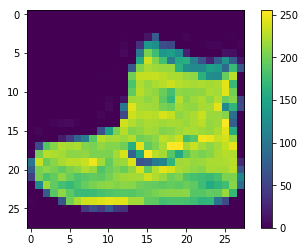

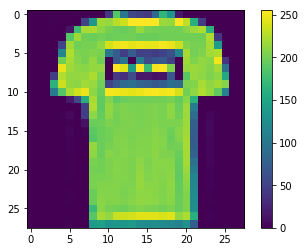

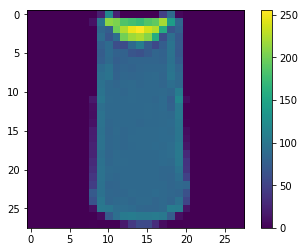

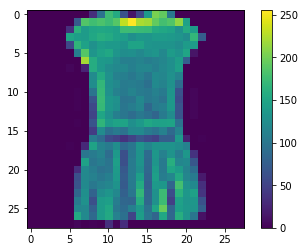

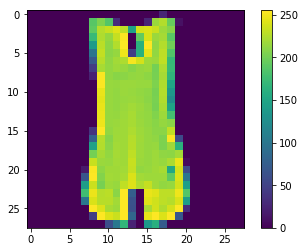

In [7]:
# lets view first 5 images
for i in range(5):
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()

In [8]:
# noramlize the pixels
train_images = train_images / 255.0
test_images = test_images / 255.0

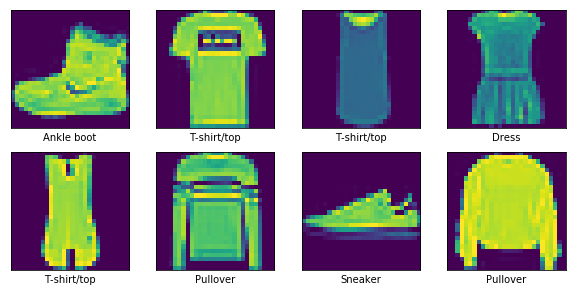

In [9]:
# plot images with their labels
plt.figure(figsize=(10,10)) # set the firgure size 10x10 pixels

# view first 8 images
for i in range(8):
    plt.subplot(4, 4, i+1) # set subplot
    plt.grid(False) # remove grid lines
    plt.xticks([]) # no xticks
    plt.yticks([]) # no yticks
    plt.xlabel(class_names[train_labels[i]]) # xlabels as the class name
    # plt.imshow(train_images[i], cmap=plt.cm.binary) # convert image to grayscale
    plt.imshow(train_images[i])

In [10]:
"""
Model config:
    Input layer = size of the image
    num of hidden layers = 1
    num of nodes in hidden layers = 128
    num of nodes in output layers = num of classes
"""
# define a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # flatten the image and pass as input
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(num_class, activation=keras.activations.softmax)
])

# compile
model.compile(optimizer=keras.optimizers.Adam(), # use adaptive learning
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

# fit model on training data
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.4942 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3744 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3380 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.3131 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.2954 - acc: 0.8915


In [11]:
# evaluate the model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 40us/step


[0.3568956370472908, 0.8704]

Test accuracy is slightly lesser than train accruacy. This may be due to the fact that the model is overfitting or underfit. 

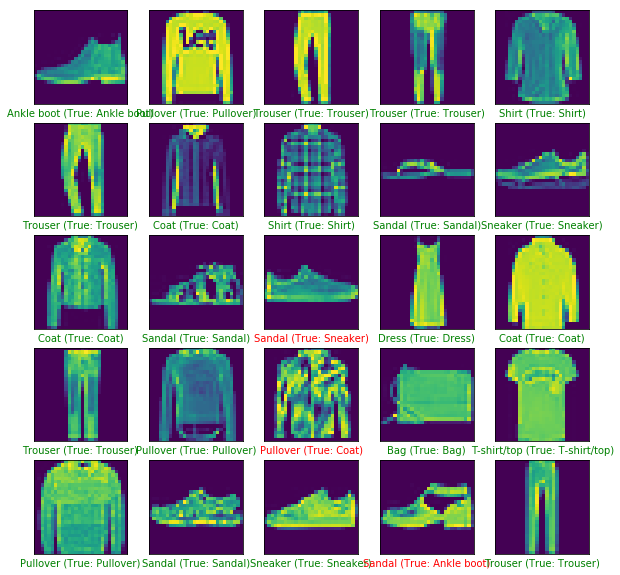

In [12]:
# view our predictions done by the model
predictions = model.predict(test_images)

plt.figure(figsize=(10,10)) # set figure size

# plot first 25 images
for i in range(25):
    plt.subplot(5, 5, i+1) # create a subplot
    plt.xticks([]) # no xticke or yticks
    plt.yticks([])
    plt.grid(False) # remove grids
    plt.imshow(test_images[i]) # plot the images
    # get the predicted class
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      c = "green" # set color as green
    else:
      c = "red" # red otherwise
    # display class name and color as xlabel
    plt.xlabel("{} (True: {})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=c)

In [13]:
# create validation set
val_images = train_images[:10000]
val_labels = train_labels[:10000]

# update tain set
train_images = train_images[10000:]
train_labels = train_labels[10000:]

In [14]:
# create a callback to monitor validation loss and stop model from underfitting or overfitting
cbk = [
  keras.callbacks.EarlyStopping(patience=5, monitor='val_loss') # stop model if 3 valid_loss increase for 3 consecutive epochs
]

In [15]:
# same model as before
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

# compile model
model.compile(optimizer = keras.optimizers.adam(),
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

# fit model on training data
model.fit(train_images, train_labels,
          epochs=100, # set max epochs
          batch_size=32,
          callbacks=cbk,
          validation_data=(val_images, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 207us/step - loss: 0.6295 - acc: 0.7782 - val_loss: 0.4547 - val_acc: 0.8393
Epoch 2/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.4840 - acc: 0.8239 - val_loss: 0.3993 - val_acc: 0.8550
Epoch 3/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.4481 - acc: 0.8375 - val_loss: 0.3876 - val_acc: 0.8561
Epoch 4/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.4255 - acc: 0.8450 - val_loss: 0.3696 - val_acc: 0.8610
Epoch 5/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.4129 - acc: 0.8494 - val_loss: 0.3525 - val_acc: 0.8720
Epoch 6/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.3987 - acc: 0.8530 - val_loss: 0.3455 - val_acc: 0.8741
Epoch 7/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.3944 - acc: 0.8553 - val_loss: 0

In [16]:
# evaluate model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 38us/step


[0.3569177854299545, 0.8804]

Model is not overfitted now. The accuracy is still low. Let's go deep and tune the model.

In [17]:
"""
Model config:
    Input layer = size of the image
    num of hidden layers = 3
    num of nodes in hidden layers = 128
    dropout rate = 0.3
    num of nodes in output layers = num of classes
"""
# new model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

# compile model
model.compile(optimizer = keras.optimizers.adam(),
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

# fit model on training data
model.fit(train_images, train_labels,
          epochs=100, # set max epochs
          batch_size=256,
          callbacks=cbk,
          validation_data=(val_images, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 79us/step - loss: 0.7891 - acc: 0.7157 - val_loss: 0.4596 - val_acc: 0.8270
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.4876 - acc: 0.8255 - val_loss: 0.3949 - val_acc: 0.8543
Epoch 3/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.4407 - acc: 0.8412 - val_loss: 0.3715 - val_acc: 0.8632
Epoch 4/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.4117 - acc: 0.8508 - val_loss: 0.3675 - val_acc: 0.8644
Epoch 5/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.3887 - acc: 0.8599 - val_loss: 0.3530 - val_acc: 0.8713
Epoch 6/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.3790 - acc: 0.8617 - val_loss: 0.3471 - val_acc: 0.8711
Epoch 7/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.3646 - acc: 0.8673 - val_loss: 0.3334 - 

In [18]:
# evaluate model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 41us/step


[0.32348146517276766, 0.8846]